Importing

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import pandas as pd

In [116]:
df = pd.read_csv("train.csv")
batch_size = len(df["label"])

In [ ]:
df["label"].value_counts()

In [119]:
model = Sequential()
model.add( Dense( units=128, activation="relu", input_shape=(784,)) )
model.add( Dense( units=64, activation="relu"))
model.add( Dense( units=10, activation="softmax") )

c:\Users\sride\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [121]:
X = df.drop(columns="label").values / 255.0
Y = df[["label"]].values

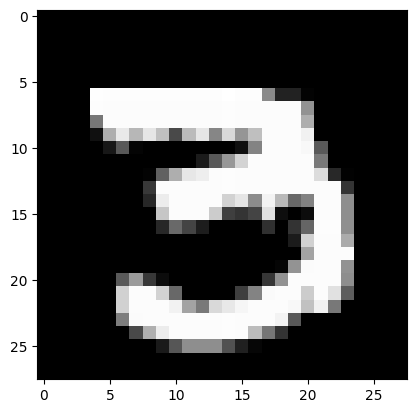

In [134]:
import matplotlib.pyplot as plt
img = X[903].reshape(28,28)
plt.imshow( img, cmap="gray")
plt.show()

In [82]:
#if using one hot y
import numpy as np
Y = Y.reshape( batch_size )
Y = np.array( [[ int(i == y) for i in range(10) ] for y in Y], np.float16 )

In [122]:
Y.shape

(42000, 1)

In [125]:
model.fit( X, Y, epochs=200, batch_size=batch_size )

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0936 - loss: 2.3381
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.1962 - loss: 2.2182
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.3350 - loss: 2.1164
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.4505 - loss: 2.0231
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.5168 - loss: 1.9318
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step - accuracy: 0.5584 - loss: 1.8397
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5861 - loss: 1.7464
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6060 - loss: 1.6526
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6246 - loss: 1.5591
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.6438 - loss: 1.4663
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6663 - loss: 1.3745
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.

In [126]:
model.save("model.hdf5")

In [127]:
del model

In [128]:
from tensorflow.keras.models import load_model
model = load_model("model.hdf5")

In [129]:
yhot = model.predict(X)
predicted = [ y.argmax() for y in yhat]

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step


[1,
 0,
 1,
 4,
 0,
 0,
 7,
 3,
 5,
 3,
 8,
 9,
 1,
 3,
 3,
 1,
 2,
 0,
 7,
 5,
 8,
 6,
 2,
 0,
 2,
 3,
 6,
 9,
 9,
 7,
 8,
 9,
 4,
 9,
 2,
 1,
 3,
 1,
 1,
 4,
 9,
 1,
 4,
 9,
 2,
 6,
 3,
 7,
 7,
 4,
 7,
 5,
 1,
 9,
 0,
 2,
 2,
 3,
 9,
 1,
 1,
 1,
 5,
 0,
 6,
 3,
 4,
 8,
 1,
 0,
 3,
 9,
 6,
 2,
 6,
 4,
 7,
 1,
 4,
 1,
 5,
 4,
 8,
 9,
 2,
 9,
 9,
 8,
 9,
 6,
 3,
 6,
 4,
 6,
 2,
 9,
 1,
 2,
 0,
 5,
 9,
 2,
 7,
 7,
 2,
 8,
 8,
 5,
 0,
 6,
 0,
 0,
 2,
 9,
 0,
 4,
 7,
 7,
 1,
 5,
 7,
 9,
 4,
 6,
 1,
 3,
 7,
 6,
 5,
 0,
 4,
 9,
 7,
 6,
 1,
 8,
 7,
 3,
 7,
 3,
 1,
 0,
 3,
 4,
 5,
 4,
 0,
 5,
 4,
 0,
 3,
 5,
 1,
 0,
 8,
 3,
 7,
 0,
 9,
 6,
 6,
 9,
 5,
 4,
 6,
 9,
 3,
 5,
 4,
 2,
 4,
 8,
 7,
 7,
 5,
 8,
 8,
 8,
 2,
 6,
 9,
 3,
 1,
 0,
 4,
 1,
 5,
 9,
 0,
 6,
 2,
 1,
 3,
 0,
 6,
 0,
 0,
 8,
 3,
 2,
 0,
 0,
 6,
 0,
 0,
 4,
 7,
 2,
 7,
 1,
 9,
 9,
 3,
 9,
 8,
 4,
 6,
 5,
 1,
 3,
 8,
 1,
 8,
 7,
 1,
 3,
 7,
 6,
 3,
 6,
 3,
 6,
 3,
 2,
 3,
 2,
 2,
 7,
 9,
 2,
 3,
 2,
 7,
 5,
 5,
 8,
 8,
 2,
 0,
 1,
